import UKBiobank and emerge info here and do analysis


# look at the boxplot for top 17 LVs (UK biobank)

# look at the boxplot for top 5 LVs (e-merge)

# look at box plot for 1 LV (both UK biobank)

Get one meeting to practice

# get lab meeting 


# summarize information of which cells and disease all the LVs are seen in

table:  row: 17 LV s, column 1: UK biobank traits associated (T1D and other), column 2: Emerge (T1D and other.)  

Boxplot: difference visit: at single LV, how it looks like. 



## load packages 

#### QQ plot to check for normality

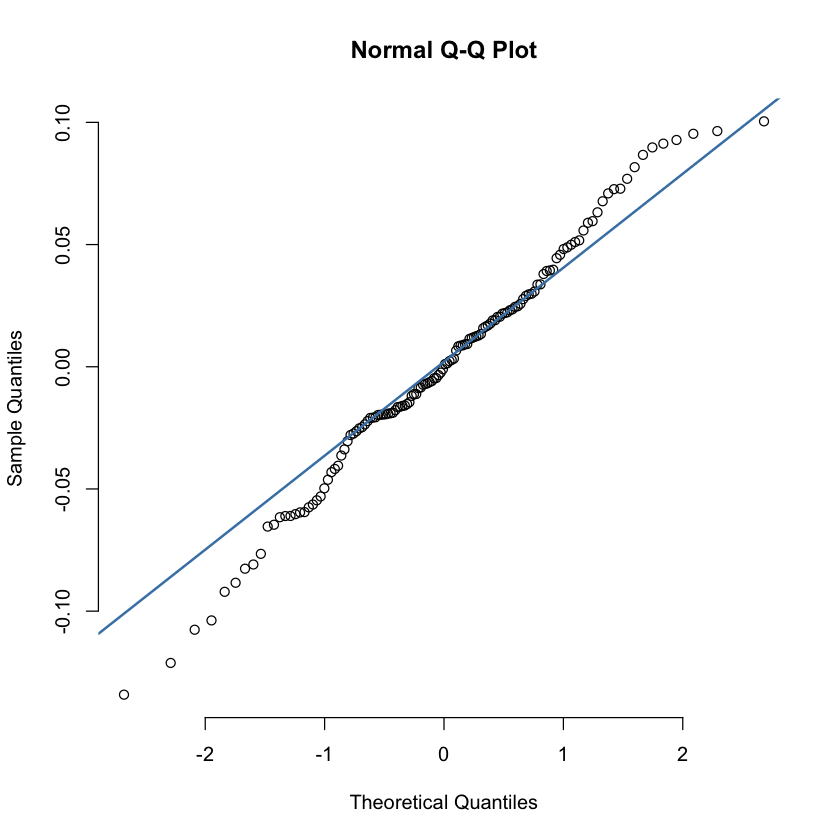

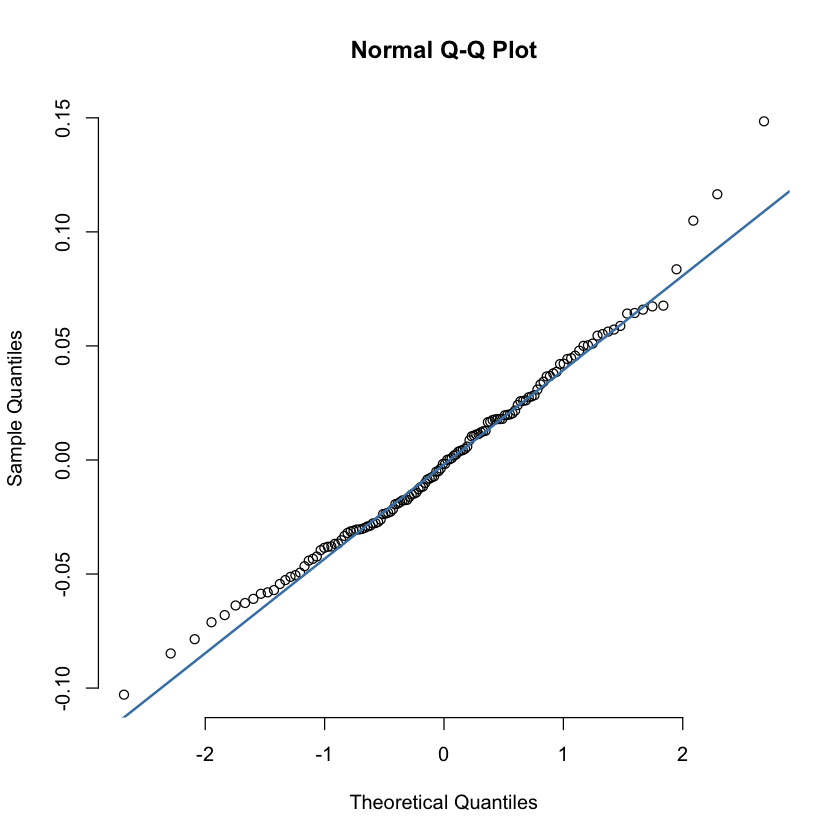

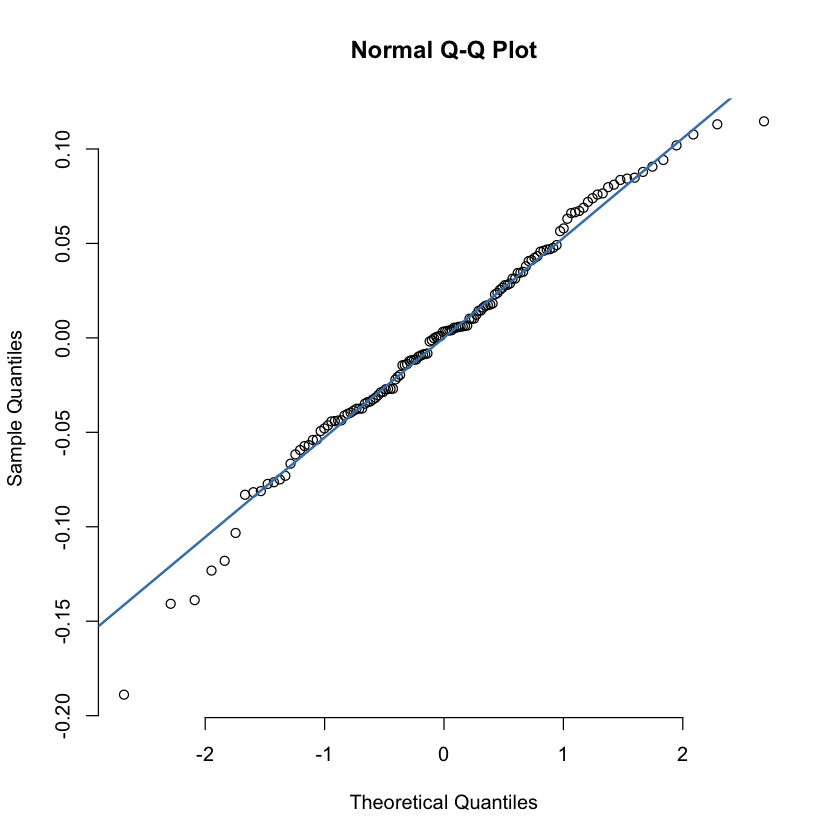

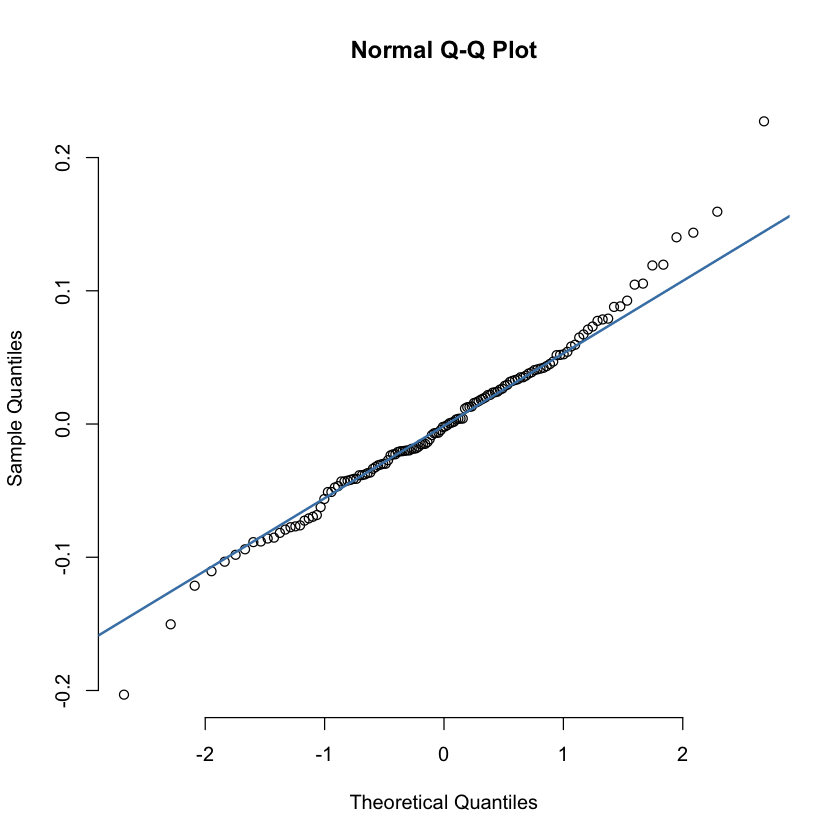

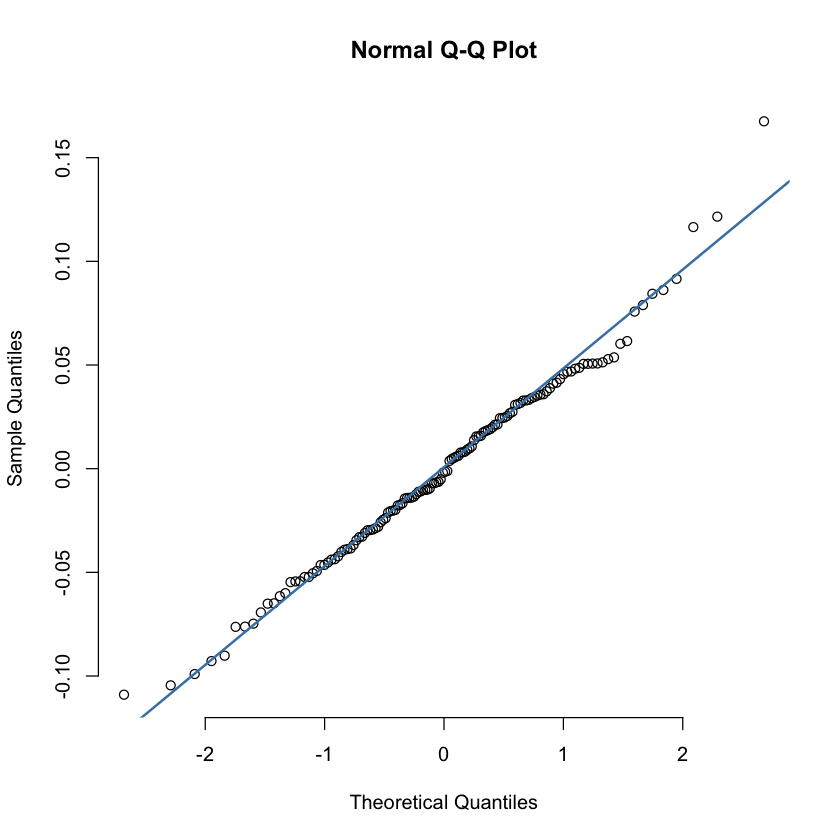

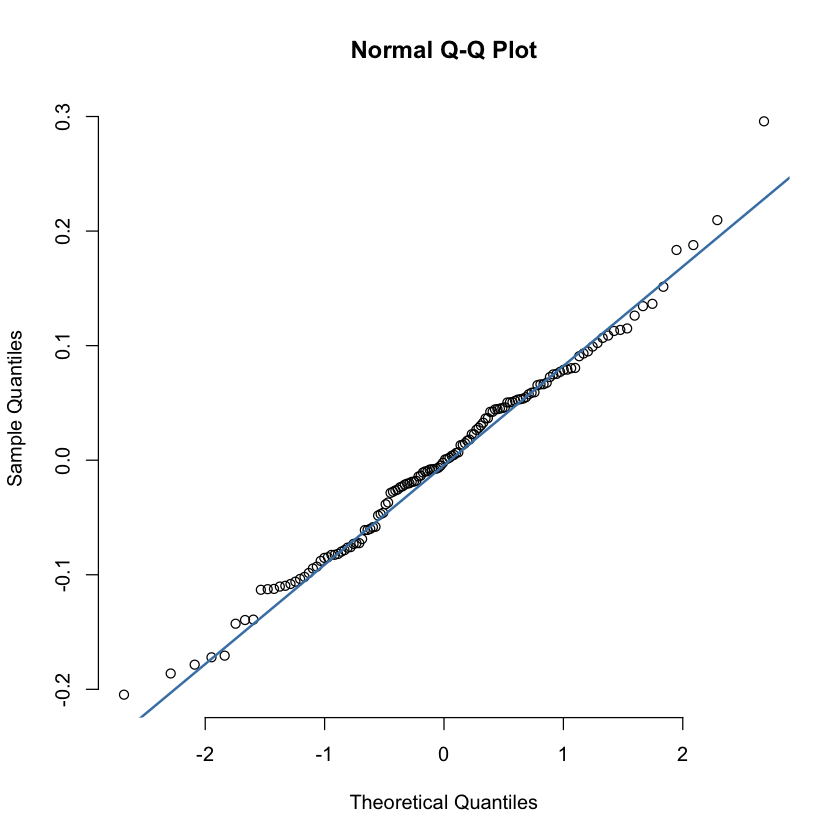

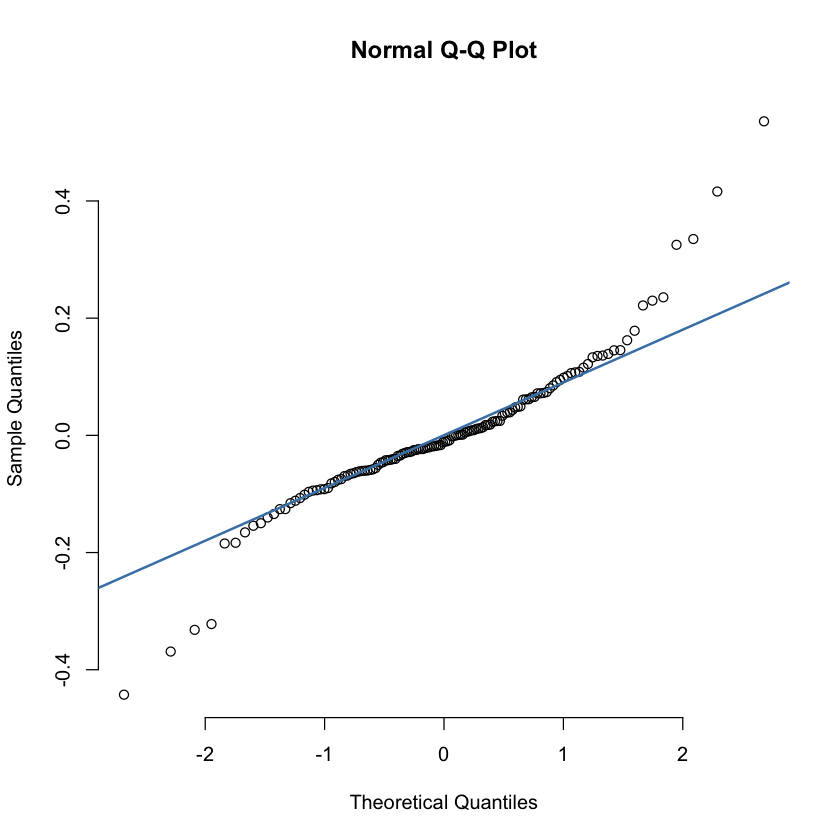

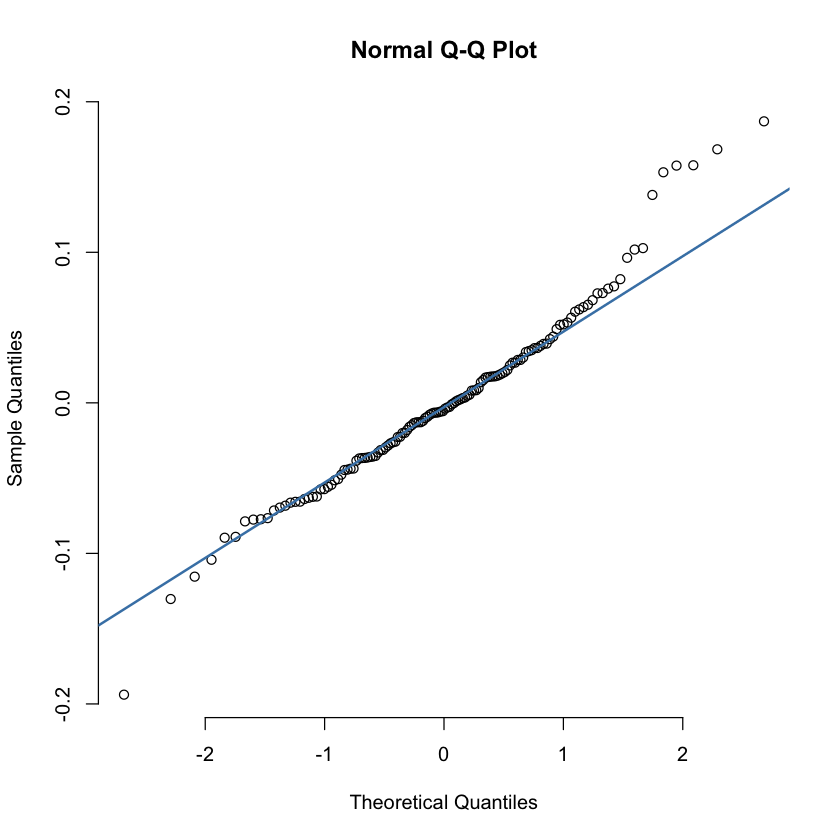

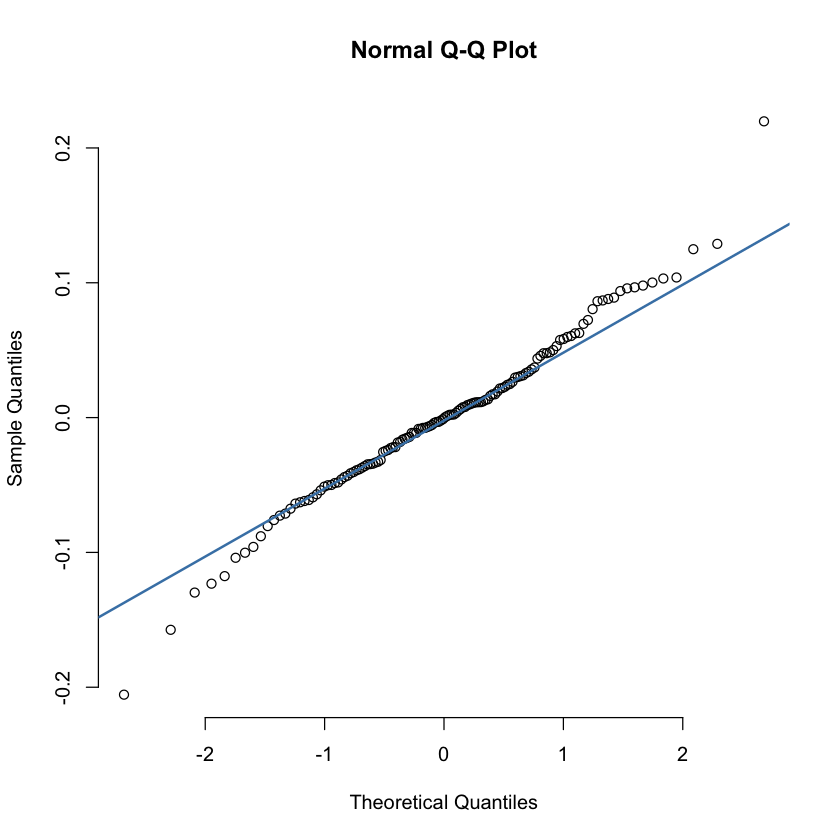

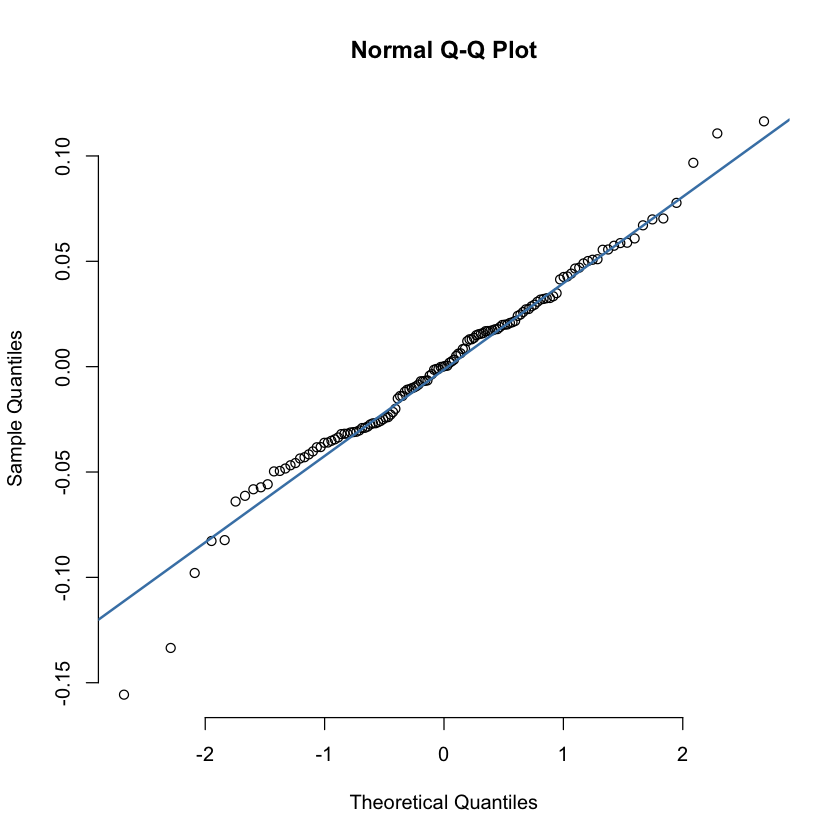

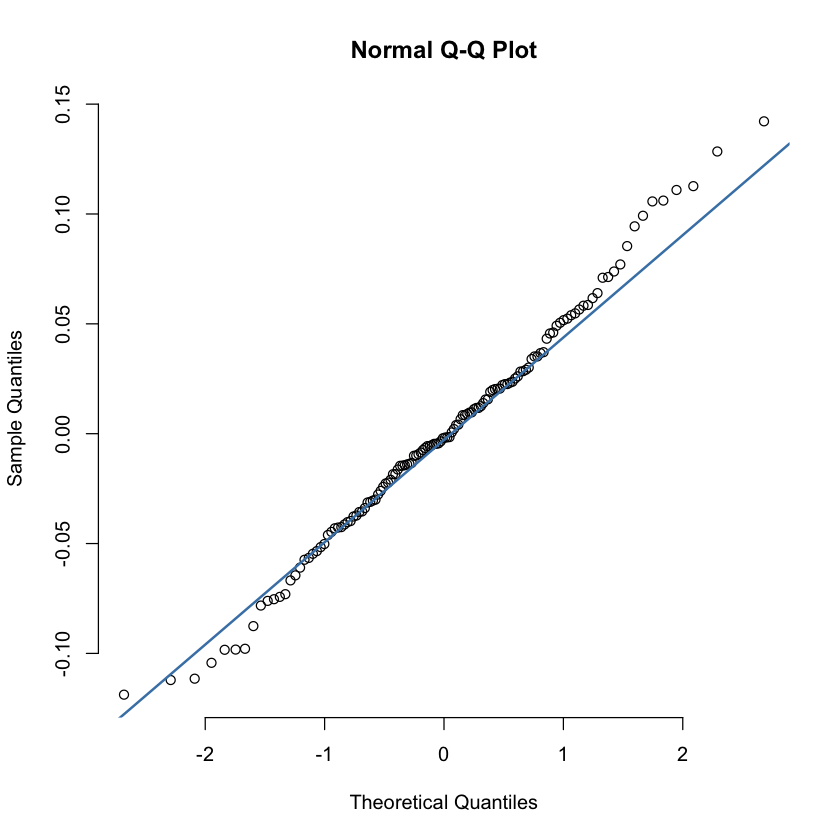

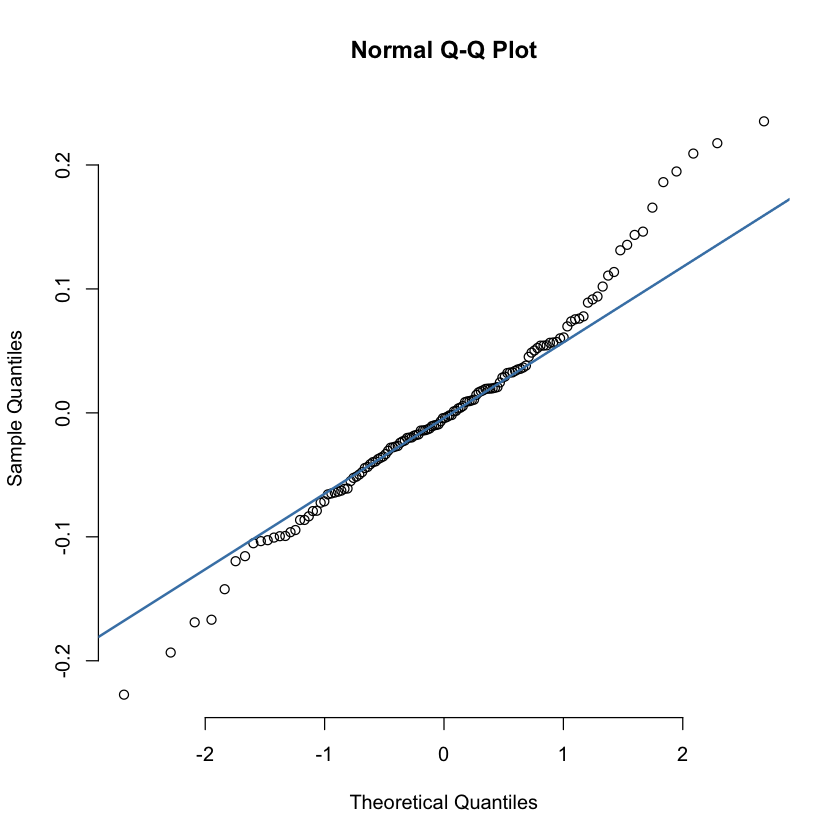

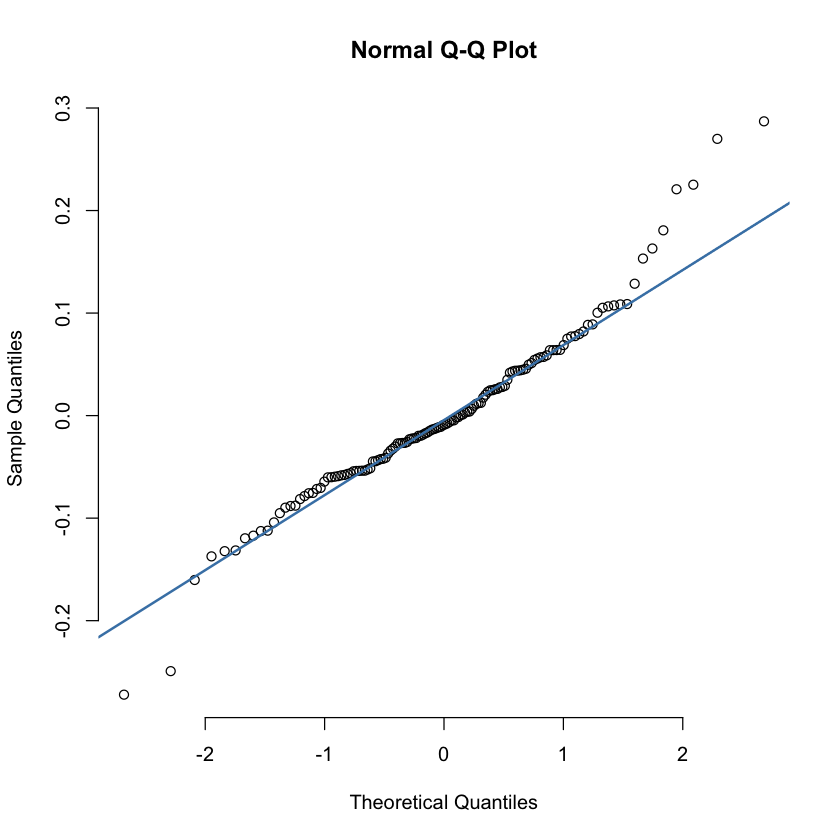

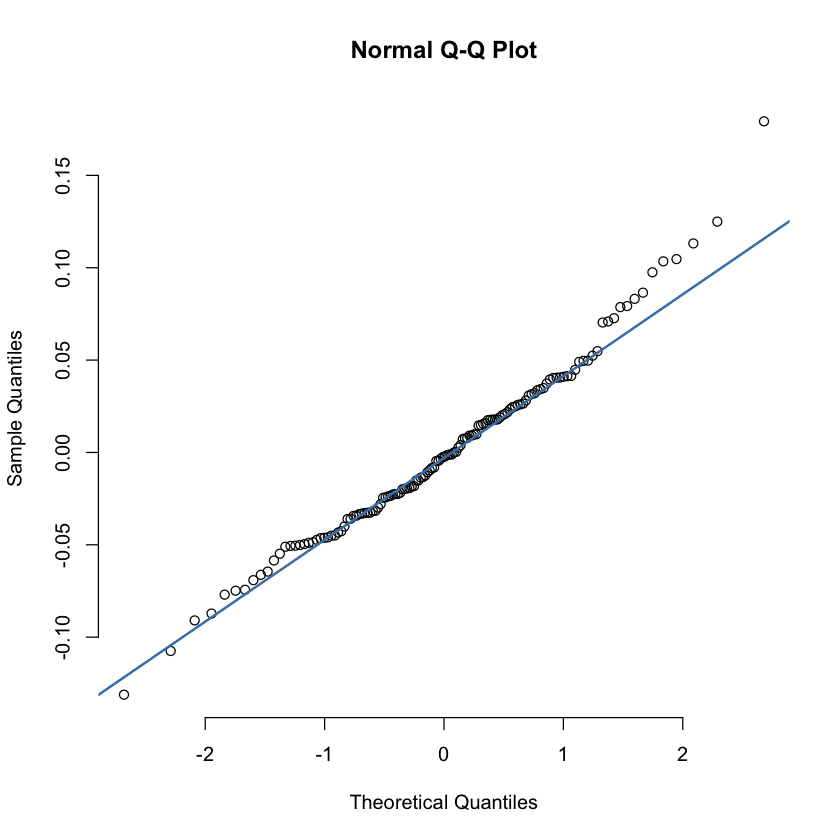

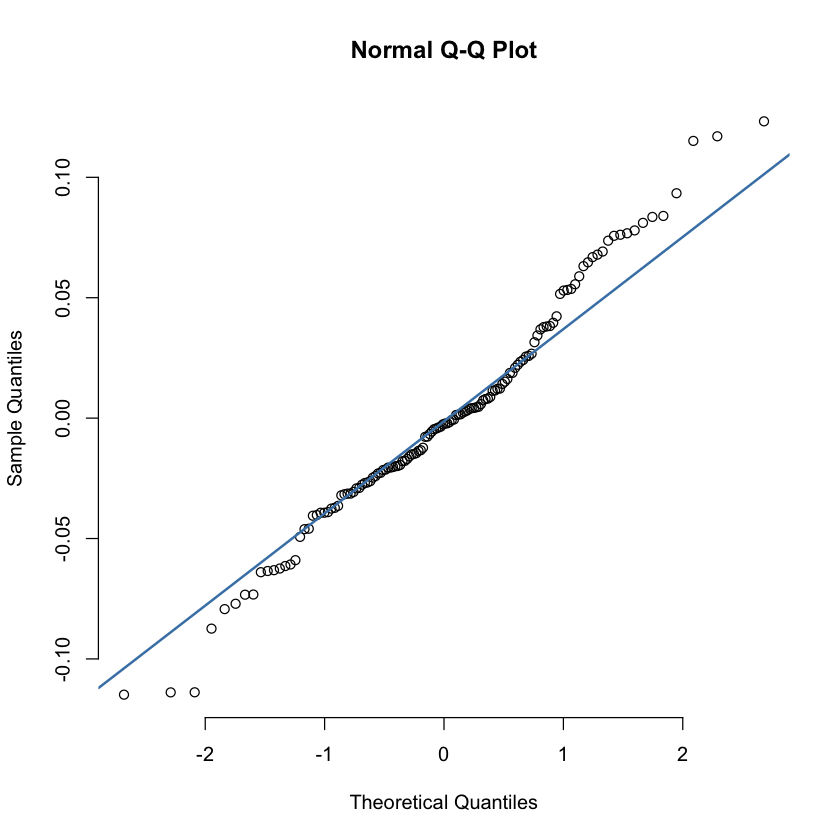

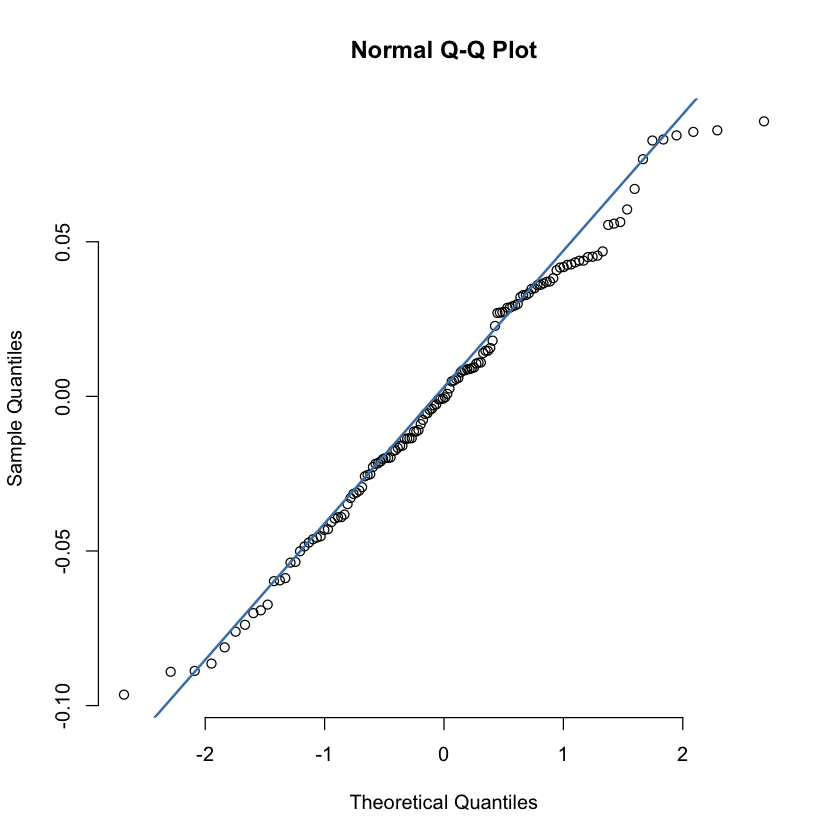

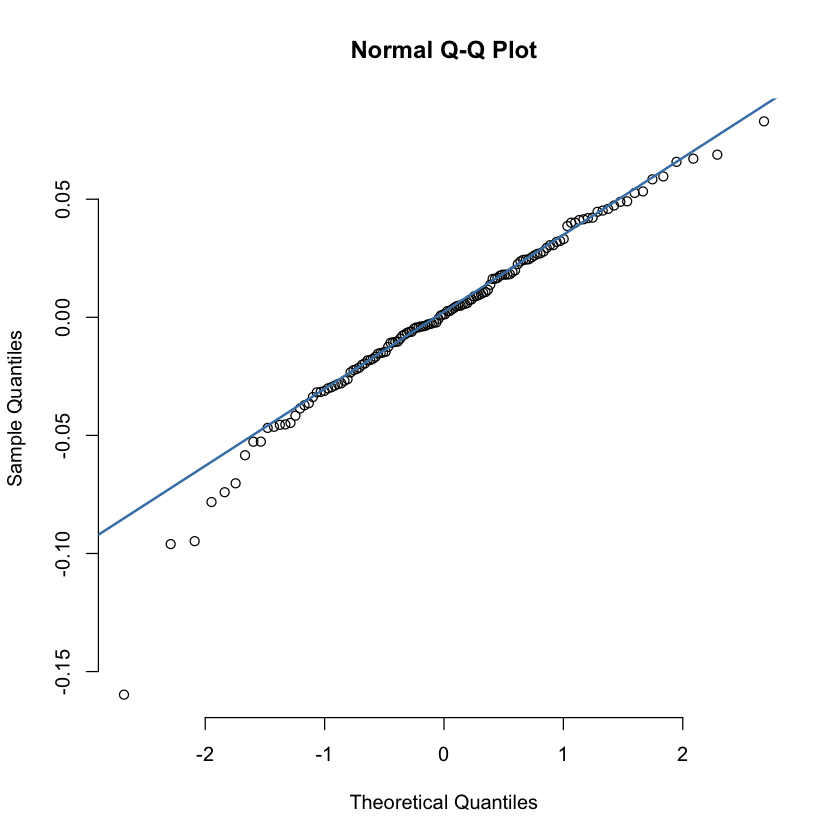

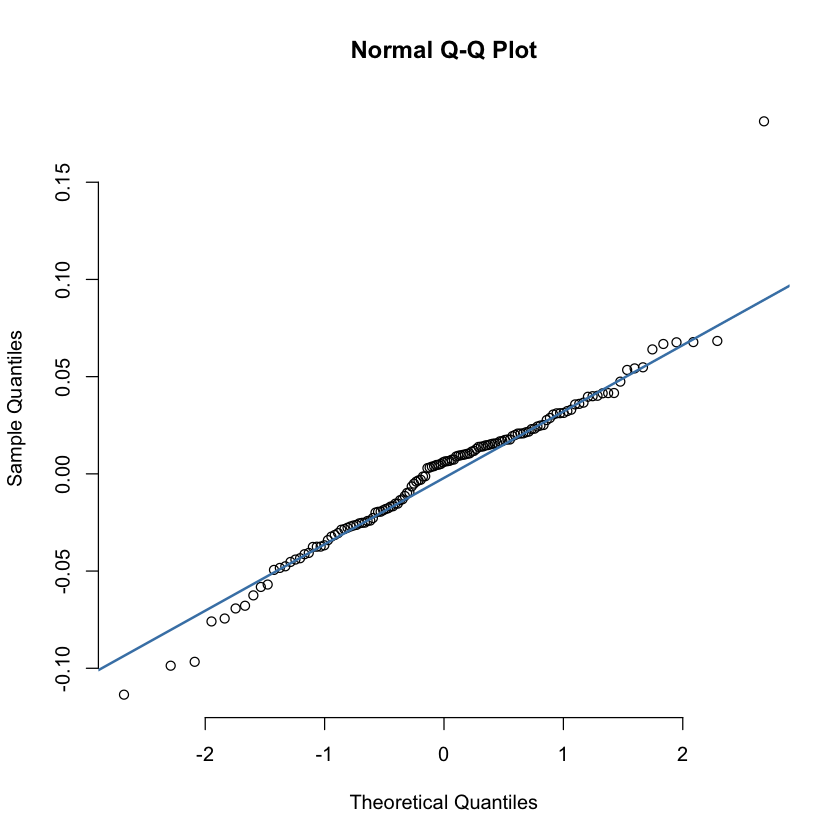

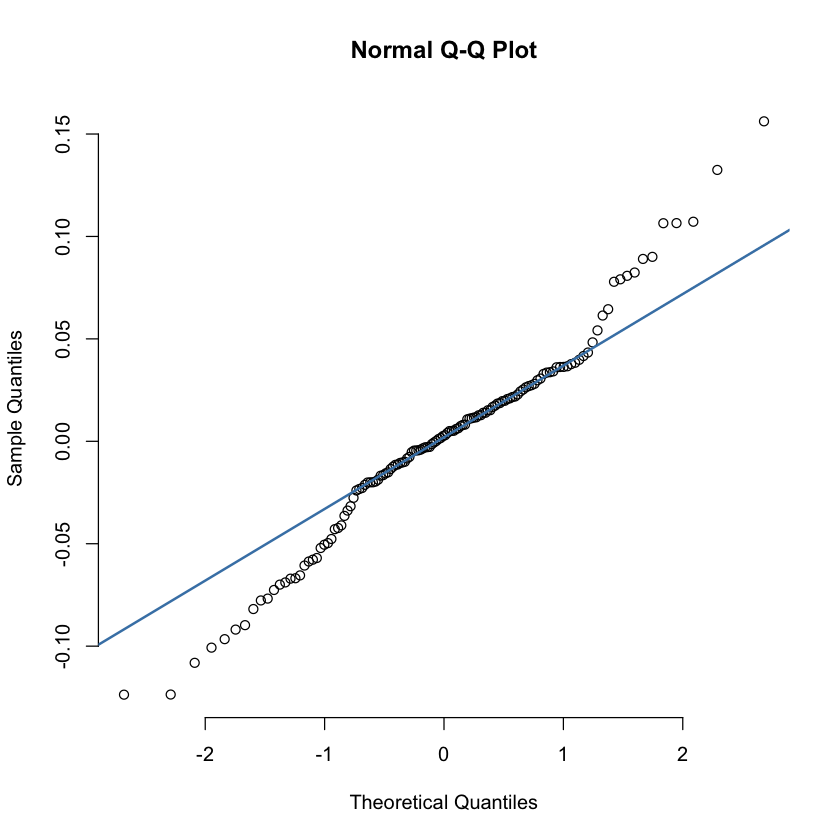

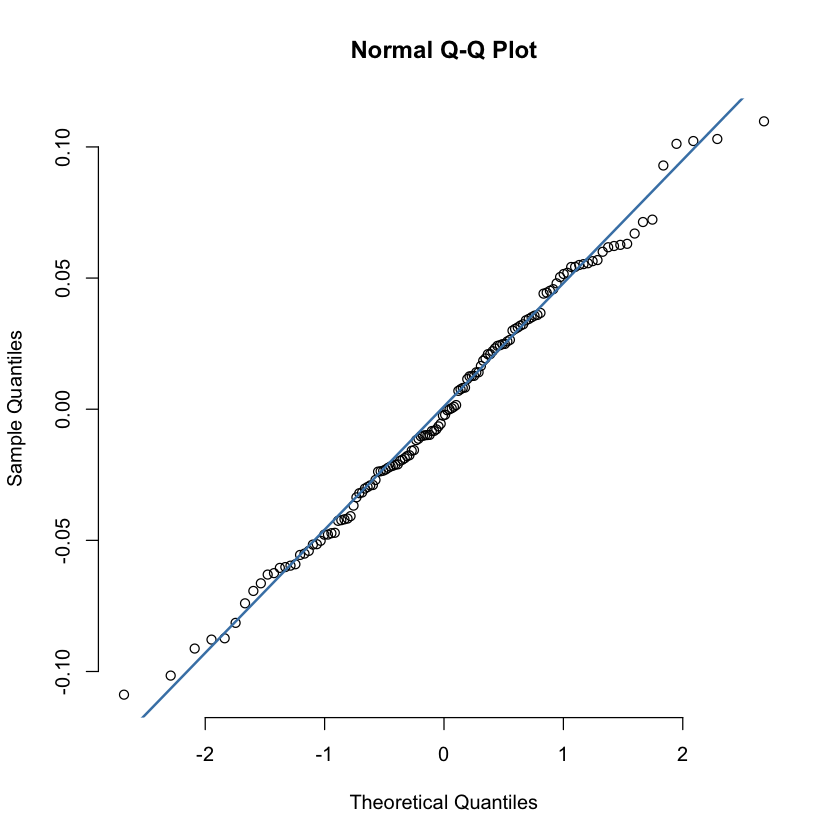

In [4]:
#randomly choose 20 LVs
rand_LV <- sample(1:987, 20, replace = FALSE)

#plot QQ plot to check for normality
for (i in rand_LV){
    qqnorm(DAISY_LV_diff[,LV_names[i]], pch = 1, frame = FALSE)
    qqline(DAISY_LV_diff[,LV_names[i]], col = "steelblue", lwd = 2)
    }

    
#qqnorm(DAISY_LV_diff$LV10, pch = 1, frame = FALSE)
#qqline(DAISY_LV_diff$LV10, col = "steelblue", lwd = 2)

In [9]:
library(tidyverse, warn.conflicts=FALSE)
library("ggpubr")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## chose time point

In [18]:
tp <- "diff"
#tp <- "1"
#tp <- "2" 

## Importing Projected RNA expression data

In [19]:
RNA_proj_group <- readRDS(paste0("output/gp_RNA_proj_",tp,".rds"))
anova_diff <- readRDS(paste0("output/anova_",tp,".rds"))
head(anova_diff,5)

LV,p_val,fdr
<chr>,<dbl>,<dbl>
LV1,0.86113563,0.9609141
LV2,0.03867616,0.5373592
LV3,0.62385859,0.9083372
LV4,0.83804977,0.9609141
LV5,0.42664561,0.8663735


## UKBiobank and emerge LV, phenotype, summary data

In [13]:
# Import data
gls_phenomexcan <- readRDS("data/input/gls-summary-phenomexcan.rds")
gls_emerge <- readRDS("data/input/gls-summary-emerge.rds")

# Type 1 diabetes traits in dataset 
UK_biobank_traits <-  c('Type 1 diabetes with ketoacidosis','Type 1 diabetes', 'Non-cancer illness code, self-reported: type 1 diabetes', 'Type 1 diabetes without complications','Type 1 diabetes with ophthalmic complications')
emerge_trait <- 'Type 1 diabetes'

## Top LVs that separates RNA expression of IA groupping using DAISY data

In [20]:
#top_daisy_LV <- anova_diff[anova_diff$fdr < 0.35,]
top_daisy_LV <- anova_diff %>% top_n(-10, fdr)
top_daisy_LV

LV,p_val,fdr
<chr>,<dbl>,<dbl>
LV92,0.0034673338,0.3309809
LV230,0.0017699626,0.3020249
LV265,0.0024437897,0.3020249
LV288,0.0024814804,0.3020249
LV368,0.0018398545,0.3020249
LV474,0.0008347271,0.3020249
LV503,0.0022555355,0.3020249
LV539,0.0027540261,0.3020249
LV648,0.0036887439,0.3309809


## Filter LVs associated with T1D in phenomexcan and emerge at p-value <0.01

In [14]:
#987 LVs in both cohort, narrow down to phenotypes related to T1D
phe_T1D_LVs <- gls_phenomexcan[gls_phenomexcan$phenotype_desc %in% UK_biobank_traits,]
e_T1D_LVs <- gls_emerge[gls_emerge$phenotype_desc %in% emerge_trait,]

# There are 17 LVs invovled in T1D from both phenomexcan and e-merge at a nominal p-value of 0.01
#122
phe_T1D_LVs_nom_0.01 <- phe_T1D_LVs[phe_T1D_LVs$pvalue < 0.01,]
#19
e_T1D_LVs_nom_0.01 <- e_T1D_LVs[e_T1D_LVs$pvalue < 0.01, ]
#17
phe_U_e_nom_0.01 <- inner_join(phe_T1D_LVs_nom_0.01,e_T1D_LVs_nom_0.01, by = "lv")
length(unique(phe_U_e_nom_0.01$lv))
colnames(phe_U_e_nom_0.01) <- c("UK_Biobank_pheno", "UK_Bio_Descr","LV","UK_Bio_pval","UK_Bio_fdr", "emer_pheno", "emer_desc","emer_pvalue","emer_fdr")
top_17_LV <- inner_join (phe_U_e_nom_0.01,anova_diff, by= "LV")
colnames(top_17_LV)[10]<- "anova_pval"
LV_list_0.01 <- as.vector(unique(top_17_LV$LV))
print(LV_list_0.01)
top_17_LV

## Analysis 1
# Isolate 17 LVs associate to T1D related traits
# Look at 17 LVs are expressed in RNAseq from Whole blood 
# What are these LVs telling us in three group
# Compute 17 daisy anova using LVs from UKbiobank and emerge  
# Look at signatures from the three groups within LVs of interest 

## Analysis 2
# Projection of visit 1 and visit 2
# visit 1,  individual + 17 LVs, cluster individuals at tp1 using 17LVs, can we recover 3 groups
# visit 2,  individual + 17 LVs, cluster individuals at tp1 using 17LVs, can we recover 3 groups
# visit 2-1,  individual + 17 LVs, cluster individuals at tp1 using 17LVs, can we recover 3 groups

#are the individuals that progressed to T1D different from LVs perspective






# Among LVs do we find pattern in beta cells, Islet of Languerhans, T-Lymphocytes 

[1] 17

 [1] "LV844" "LV913" "LV205" "LV71"  "LV45"  "LV342" "LV572" "LV293" "LV987"
[10] "LV109" "LV906" "LV54"  "LV625" "LV187" "LV52"  "LV861" "LV835"


UK_Biobank_pheno,UK_Bio_Descr,LV,UK_Bio_pval,UK_Bio_fdr,emer_pheno,emer_desc,emer_pvalue,emer_fdr,anova_pval,fdr
<fct>,<fct>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
E4_DM1KETO,Type 1 diabetes with ketoacidosis,LV844,2.245769e-08,1.030455e-04,EUR_250.1,Type 1 diabetes,1.462231e-03,0.356256946,0.12760946,0.9383744
E4_DM1KETO,Type 1 diabetes with ketoacidosis,LV913,7.235450e-06,1.234281e-02,EUR_250.1,Type 1 diabetes,3.166332e-06,0.007851037,0.44446214,0.9679793
E4_DM1KETO,Type 1 diabetes with ketoacidosis,LV205,3.308170e-05,3.795903e-02,EUR_250.1,Type 1 diabetes,9.403482e-04,0.295660009,0.06713482,0.9383744
E4_DM1KETO,Type 1 diabetes with ketoacidosis,LV71,5.915115e-05,5.673195e-02,EUR_250.1,Type 1 diabetes,8.541361e-05,0.084453886,0.14964902,0.9383744
E4_DM1KETO,Type 1 diabetes with ketoacidosis,LV45,8.689770e-05,7.281139e-02,EUR_250.1,Type 1 diabetes,2.955102e-04,0.164763413,0.25009303,0.9428521
E4_DM1KETO,Type 1 diabetes with ketoacidosis,LV342,2.371331e-04,1.348592e-01,EUR_250.1,Type 1 diabetes,4.127766e-05,0.052454101,0.29613390,0.9428521
E4_DM1KETO,Type 1 diabetes with ketoacidosis,LV572,7.776255e-04,2.527294e-01,EUR_250.1,Type 1 diabetes,6.283827e-03,0.571736412,0.58978712,0.9683861
E4_DM1KETO,Type 1 diabetes with ketoacidosis,LV293,1.100424e-03,2.963357e-01,EUR_250.1,Type 1 diabetes,1.405687e-04,0.114640980,0.85722619,0.9842743
E4_DM1KETO,Type 1 diabetes with ketoacidosis,LV987,1.480734e-03,3.343557e-01,EUR_250.1,Type 1 diabetes,3.936295e-03,0.492052254,0.36044527,0.9605245


In [16]:
top_UK_LV <- top_17_LV %>% top_n(-10, anova_pval)

top_UK_LV

UK_Biobank_pheno,UK_Bio_Descr,LV,UK_Bio_pval,UK_Bio_fdr,emer_pheno,emer_desc,emer_pvalue,emer_fdr,anova_pval,fdr
<fct>,<fct>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
E4_DM1KETO,Type 1 diabetes with ketoacidosis,LV844,2.245769e-08,1.030455e-04,EUR_250.1,Type 1 diabetes,0.0014622312,0.3562569,0.12760946,0.9383744
E4_DM1KETO,Type 1 diabetes with ketoacidosis,LV205,3.308170e-05,3.795903e-02,EUR_250.1,Type 1 diabetes,0.0009403482,0.2956600,0.06713482,0.9383744
E4_DM1KETO,Type 1 diabetes with ketoacidosis,LV109,1.488463e-03,3.348269e-01,EUR_250.1,Type 1 diabetes,0.0065729036,0.5803837,0.14449619,0.9383744
E4_DM1,Type 1 diabetes,LV844,5.817979e-06,1.044550e-02,EUR_250.1,Type 1 diabetes,0.0014622312,0.3562569,0.12760946,0.9383744
E4_DM1,Type 1 diabetes,LV205,1.238614e-04,9.071821e-02,EUR_250.1,Type 1 diabetes,0.0009403482,0.2956600,0.06713482,0.9383744
E4_DM1,Type 1 diabetes,LV109,8.776640e-04,2.683919e-01,EUR_250.1,Type 1 diabetes,0.0065729036,0.5803837,0.14449619,0.9383744
20002_1222,"Non-cancer illness code, self-reported: type 1 diabetes",LV844,9.318352e-09,4.705034e-05,EUR_250.1,Type 1 diabetes,0.0014622312,0.3562569,0.12760946,0.9383744
20002_1222,"Non-cancer illness code, self-reported: type 1 diabetes",LV109,3.576582e-04,1.704246e-01,EUR_250.1,Type 1 diabetes,0.0065729036,0.5803837,0.14449619,0.9383744
20002_1222,"Non-cancer illness code, self-reported: type 1 diabetes",LV205,4.346665e-04,1.892908e-01,EUR_250.1,Type 1 diabetes,0.0009403482,0.2956600,0.06713482,0.9383744


Saving 7 x 7 in image


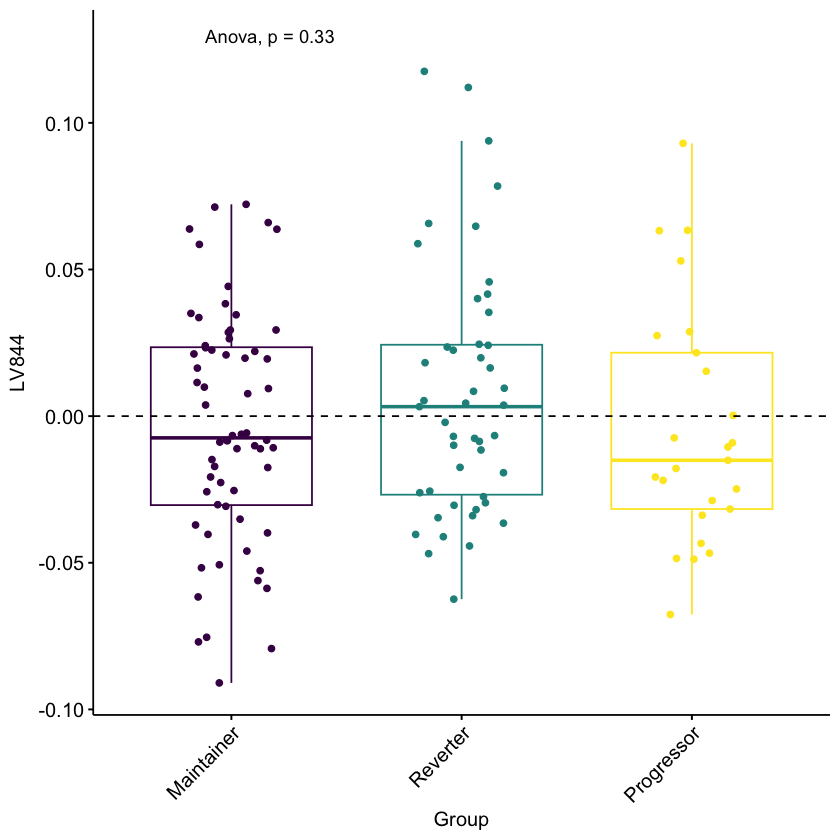

Saving 7 x 7 in image


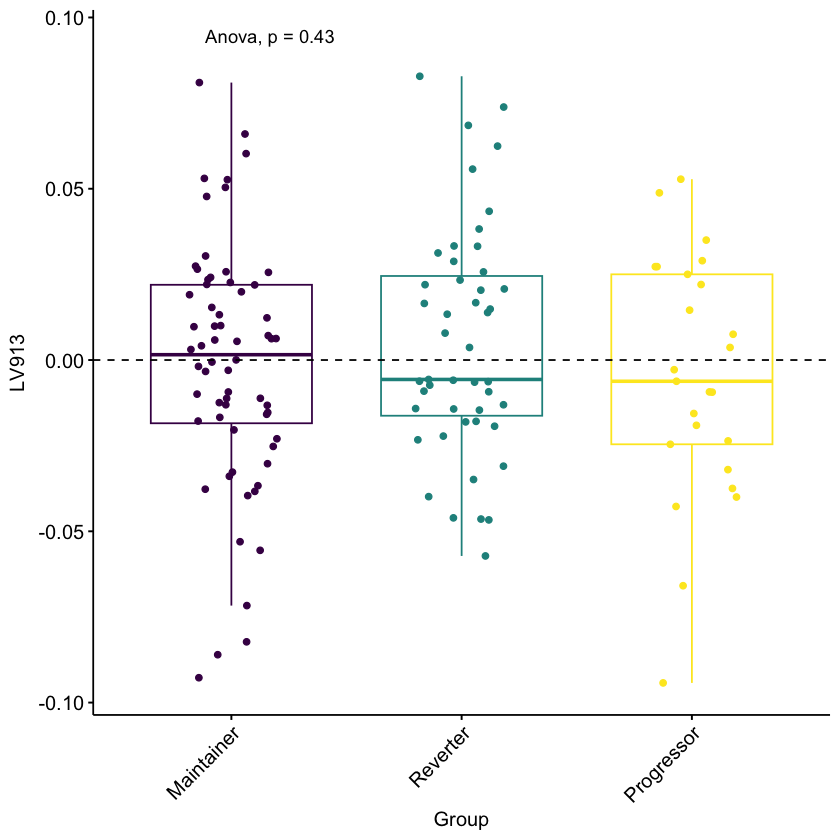

Saving 7 x 7 in image


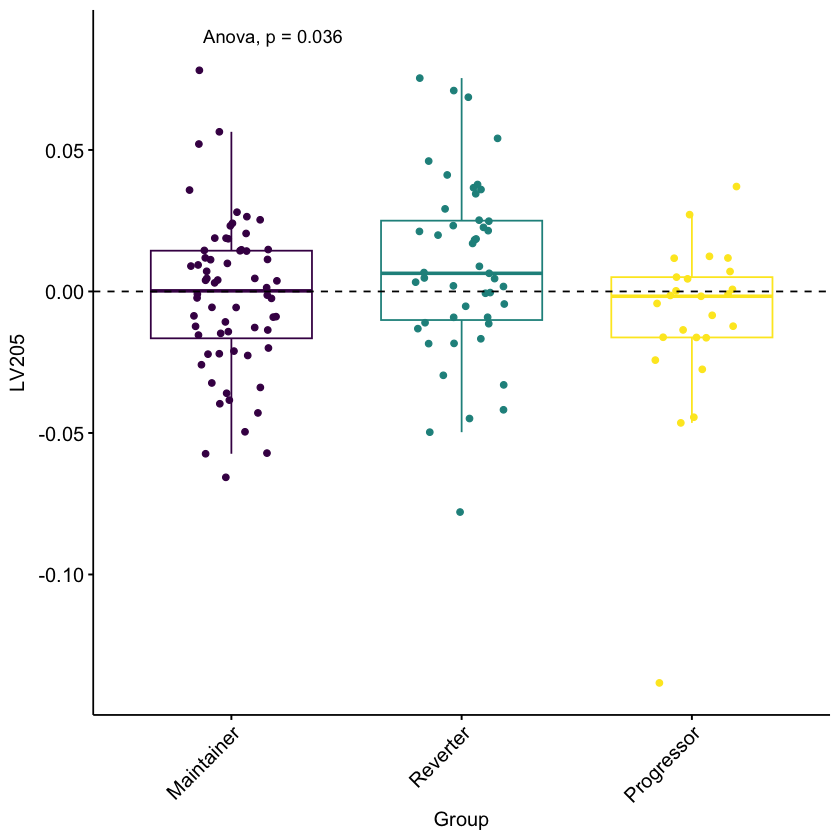

Saving 7 x 7 in image


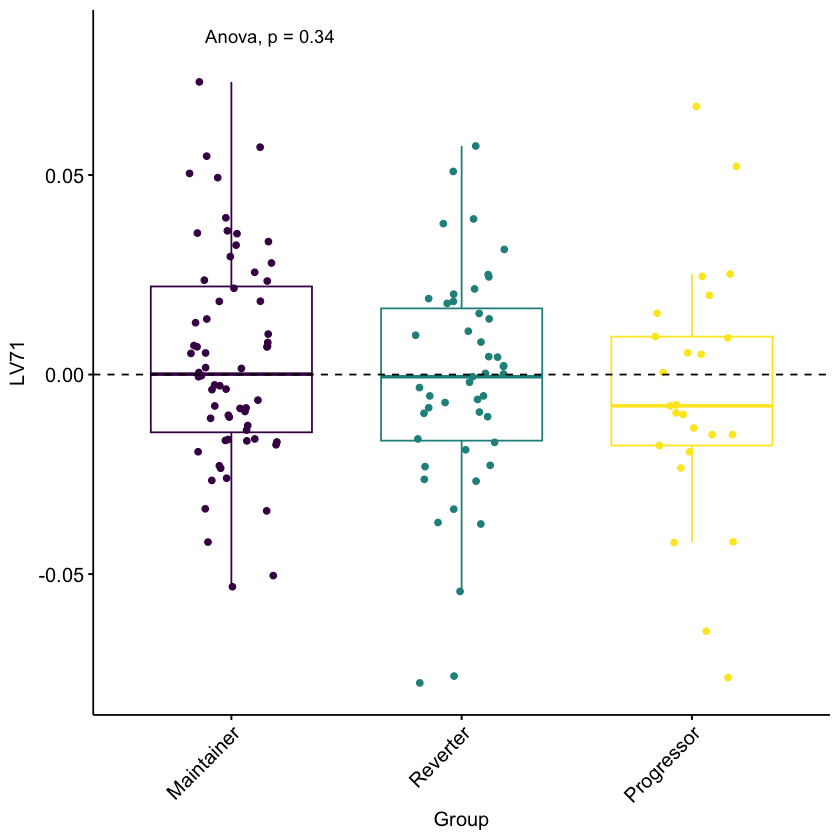

Saving 7 x 7 in image


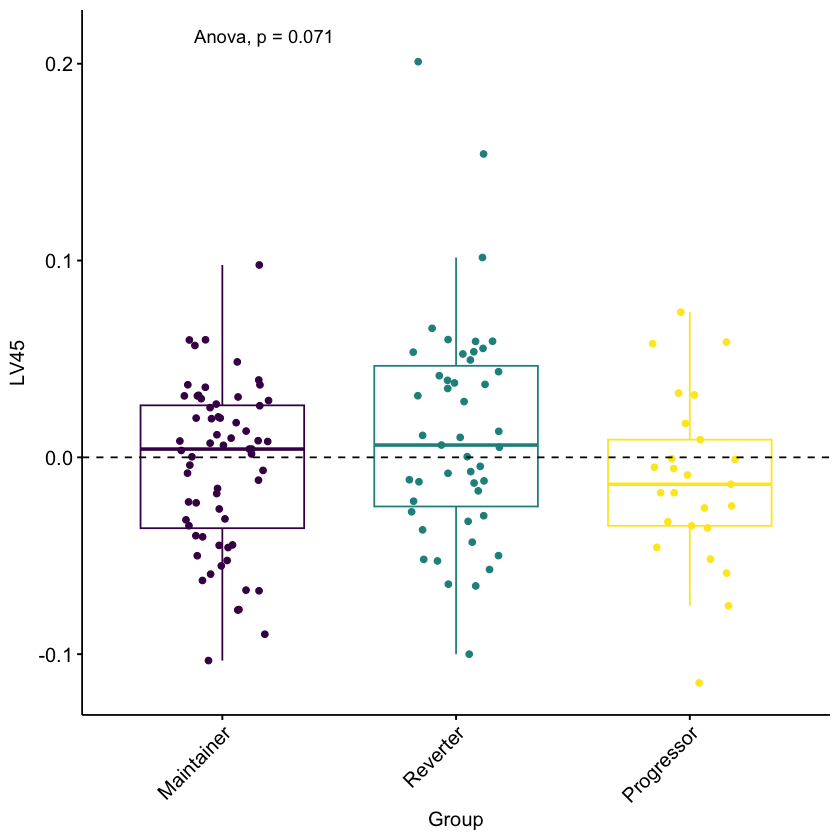

Saving 7 x 7 in image


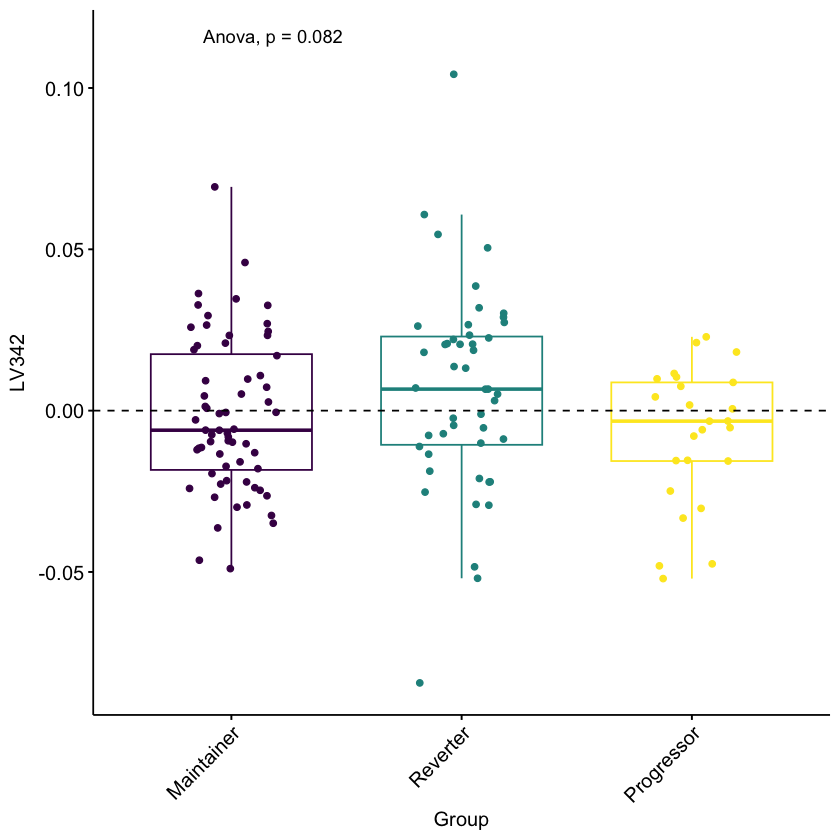

Saving 7 x 7 in image


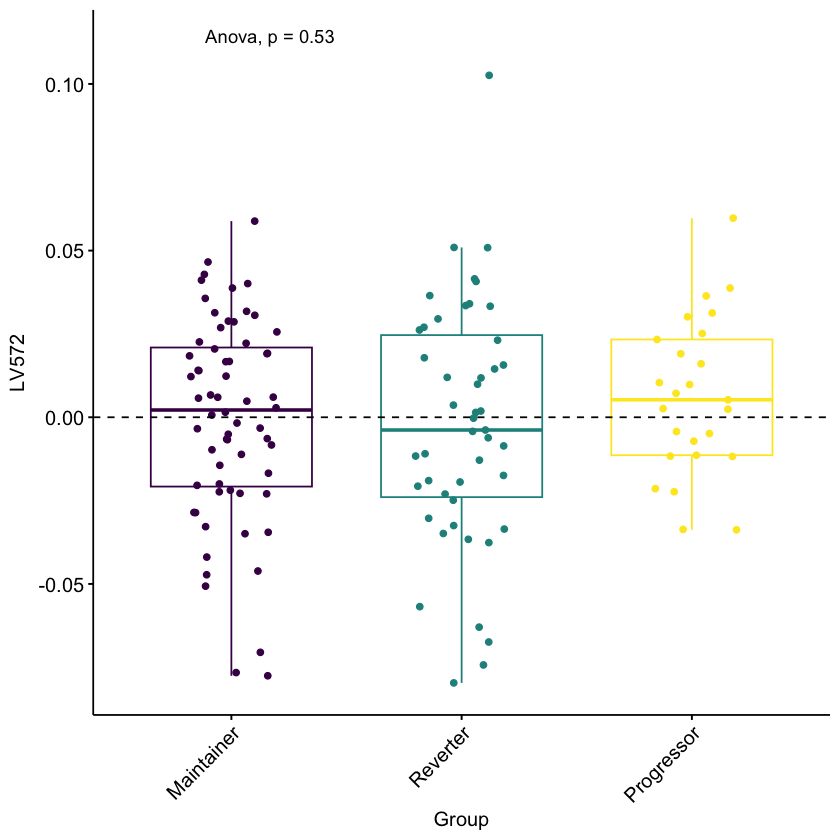

Saving 7 x 7 in image


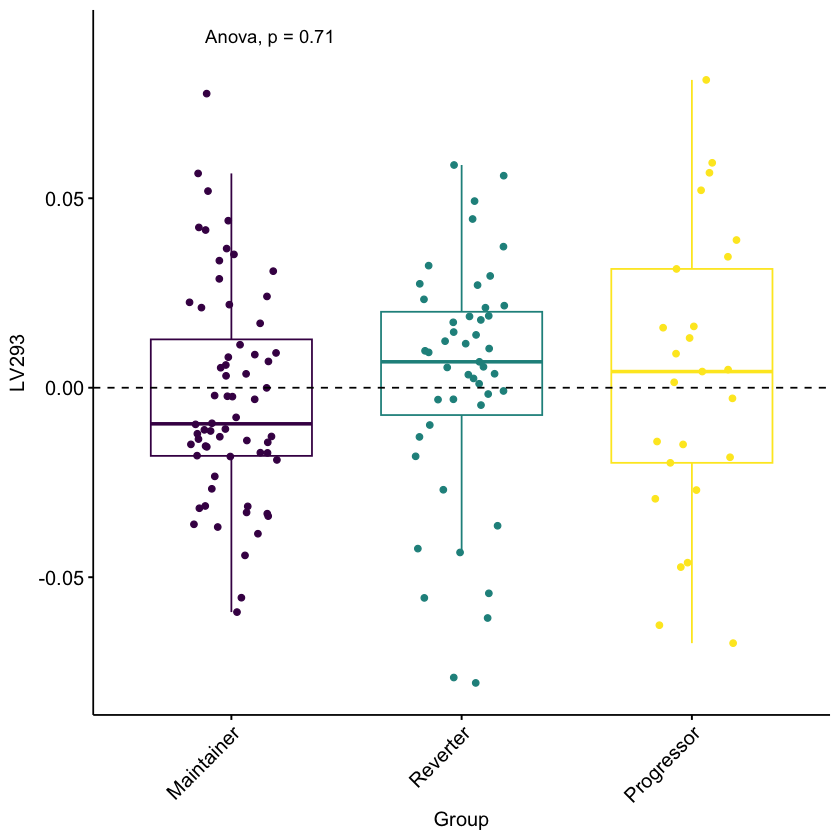

Saving 7 x 7 in image


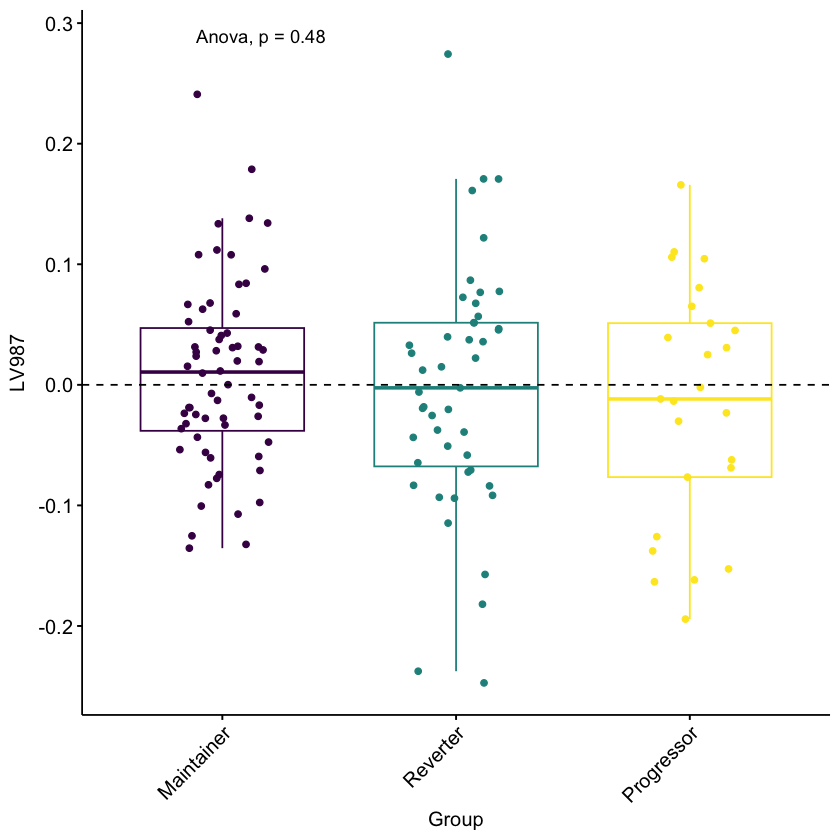

Saving 7 x 7 in image


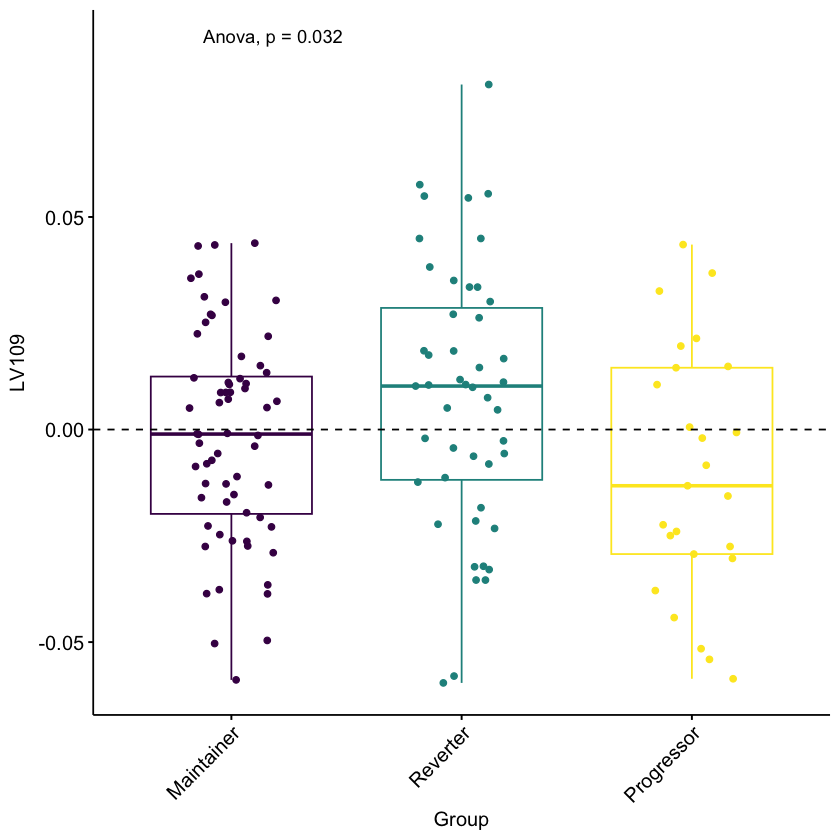

Saving 7 x 7 in image


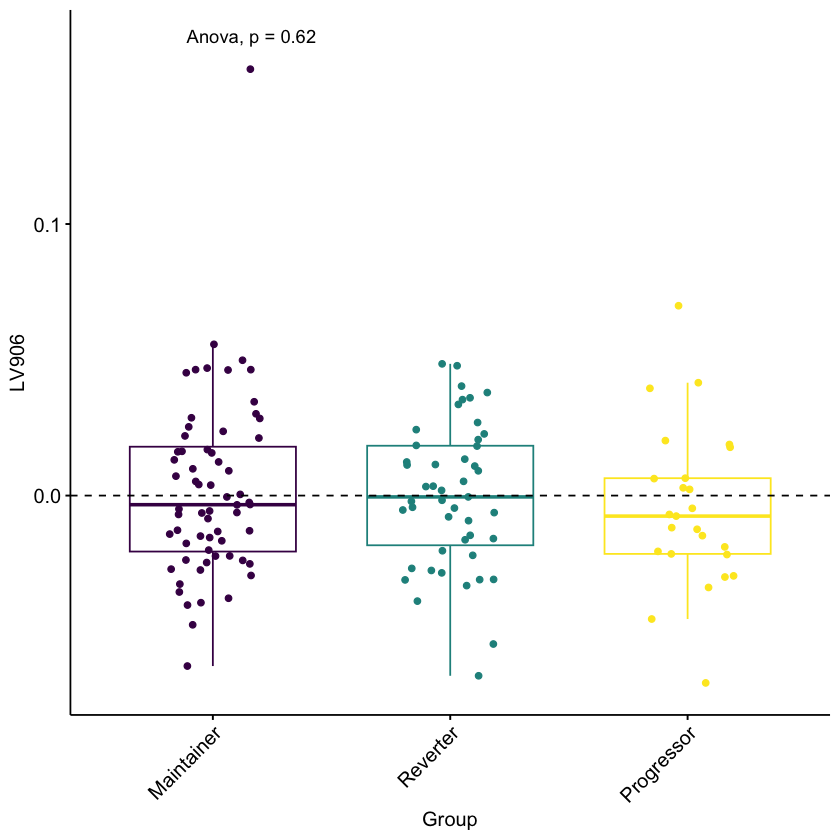

Saving 7 x 7 in image


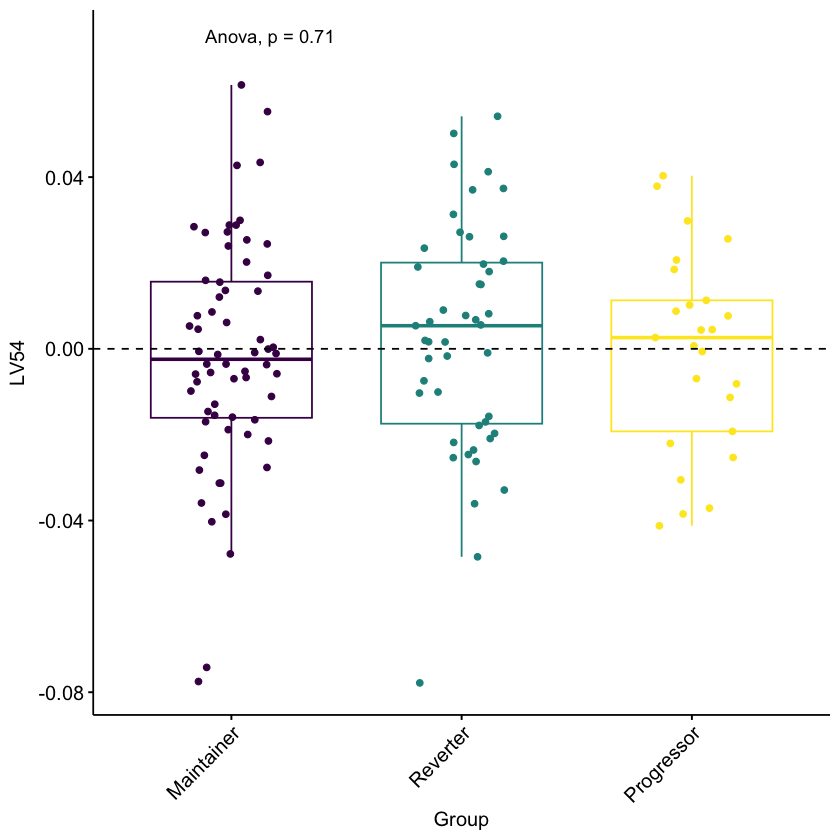

Saving 7 x 7 in image


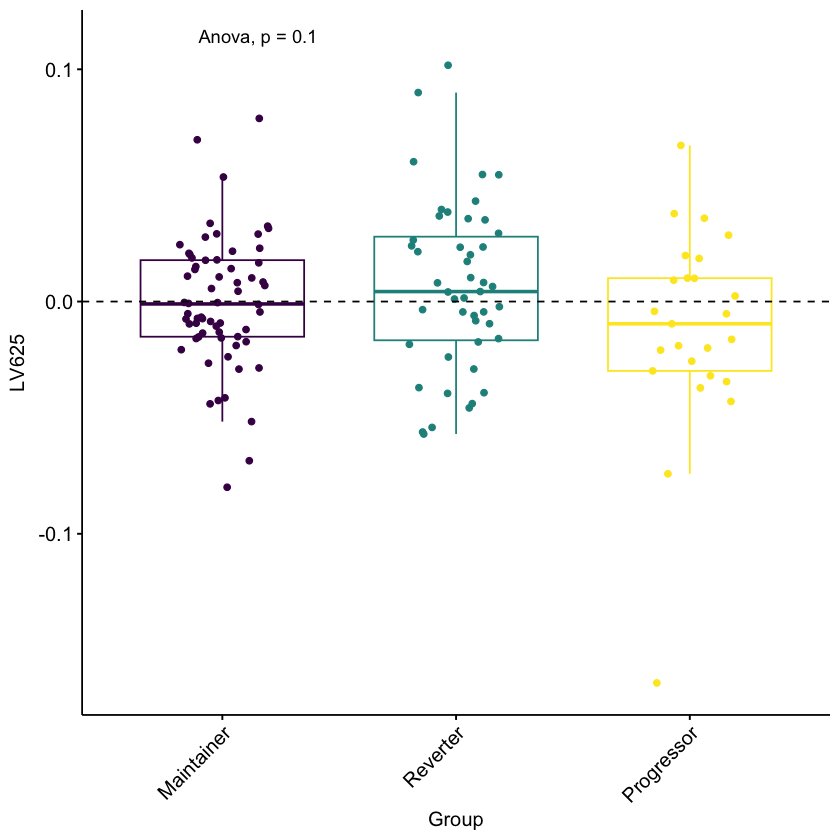

Saving 7 x 7 in image


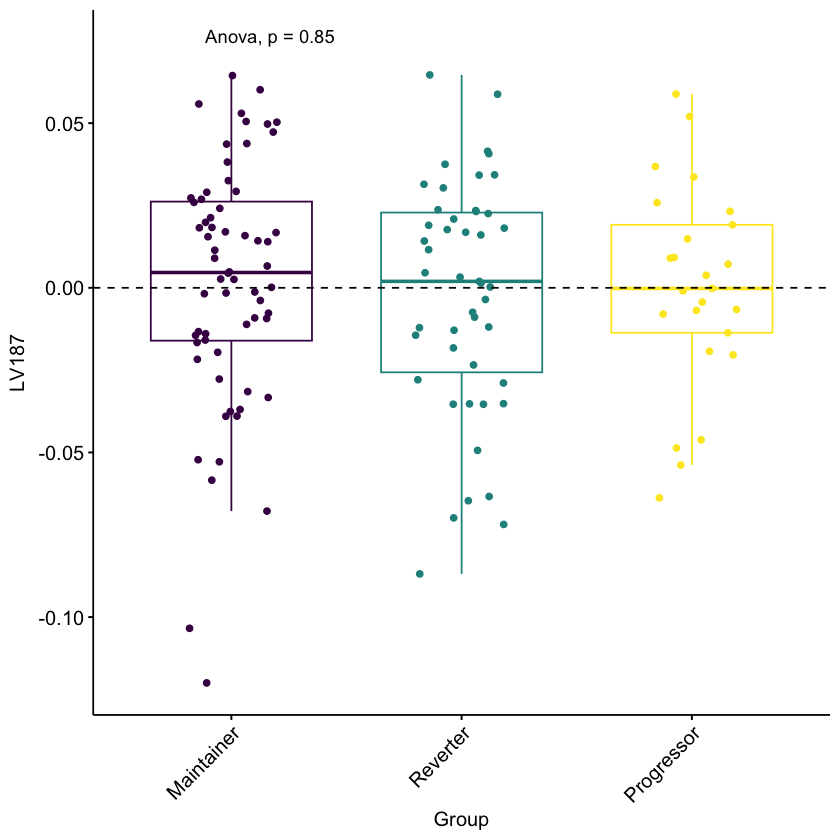

Saving 7 x 7 in image


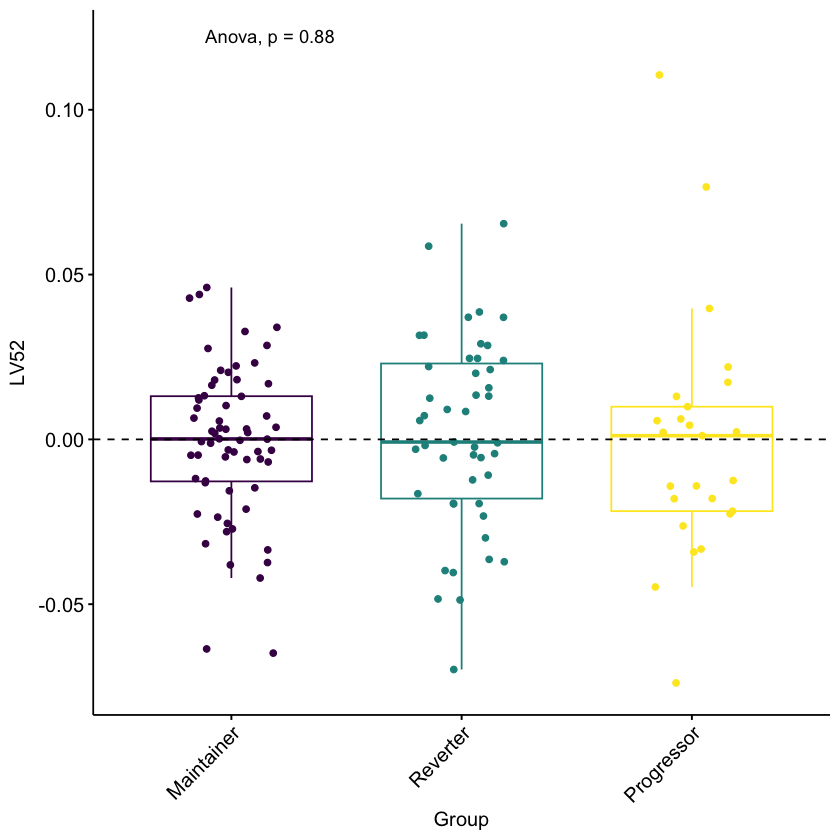

Saving 7 x 7 in image


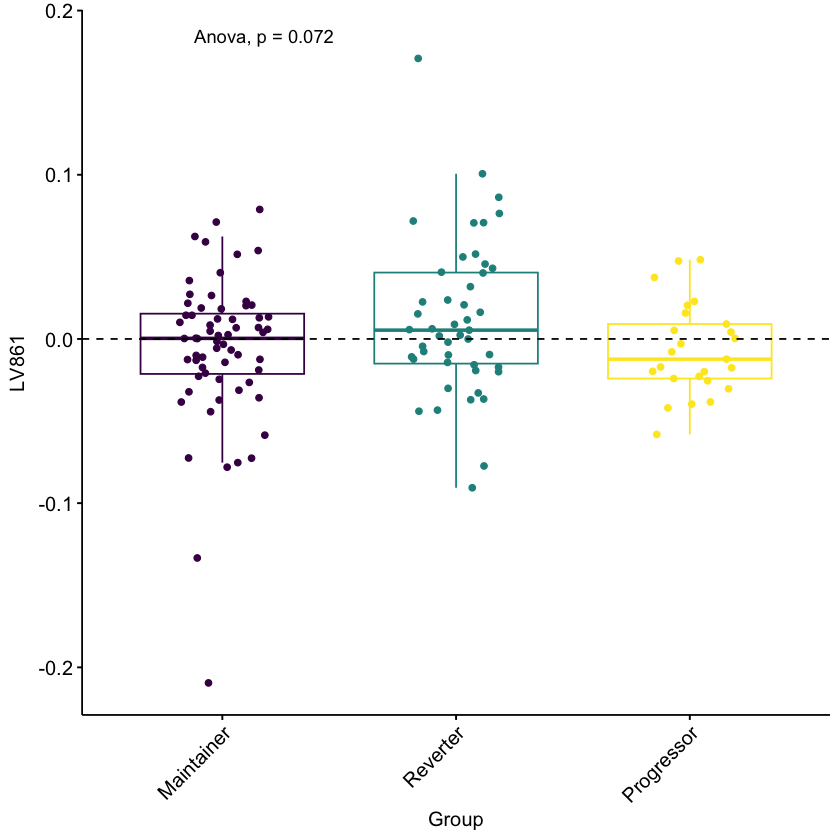

Saving 7 x 7 in image


null device 
          1

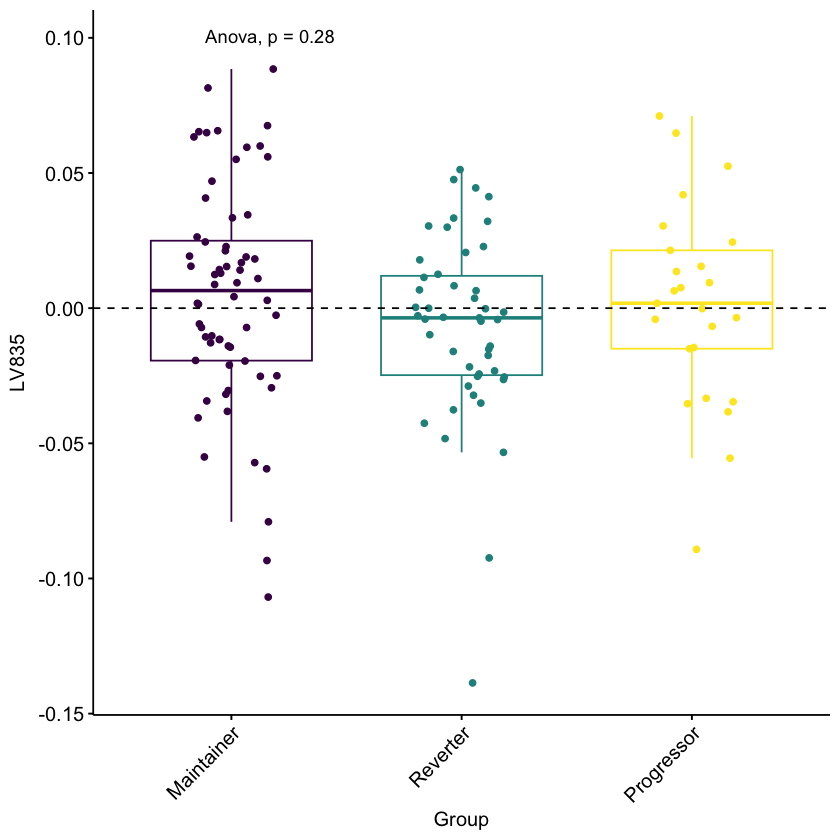

In [37]:
for (i in 1:length(LV_list_0.01)){
    plot_i <- ggboxplot(RNA_proj_group, x = "Group", y = LV_list_0.01[i], color = "Group", 
          add = "jitter", legend = "none") +
  rotate_x_text(angle = 45)+
  geom_hline(yintercept = mean(RNA_proj_group[,LV_list_0.01[i]]), linetype = 2)+ # Add horizontal line at base mean
  stat_compare_means(method = "anova", label.y = max(RNA_proj_group[,LV_list_0.01[i]])+ 0.01)       # Add global annova p-value 
    print(plot_i)
    
    ggsave(paste0("LV_",LV_list_0.01[i],"_visit_",tp,".png"),path = paste0("figures/visit_",tp))
    } 
    dev.off()

In [38]:
# There are 2 LVs invovled in T1D from both phenomexcan and e-merge at a FDR adjusted p-value of 0.1
#18
phe_T1D_LVs_0.10 <- phe_T1D_LVs[phe_T1D_LVs$fdr < 0.10, ]
#4
e_T1D_LVs_0.10 <- e_T1D_LVs[e_T1D_LVs$fdr < 0.10, ]
#2 LV 913 and LV 71
phe_U_e_0.1 <- inner_join(phe_T1D_LVs_0.10,e_T1D_LVs_0.10, by = "lv")
length(unique(phe_U_e_0.1$lv))
phe_U_e_0.1
# There is 1 LVs involved in T1D from both phenomexcan and e-merge at a FDR adjusted p-value of 0.01
#13
phe_T1D_LVs_0.05 <- phe_T1D_LVs[phe_T1D_LVs$fdr < 0.05, ]
#2
e_T1D_LVs_0.05 <- e_T1D_LVs[e_T1D_LVs$fdr < 0.05, ]
#1 LV 913
phe_U_e_0.05 <- inner_join(phe_T1D_LVs_0.05,e_T1D_LVs_0.05, by = "lv")
length(unique(phe_U_e_0.05$lv))
phe_U_e_0.05

[1] 2

phenotype.x,phenotype_desc.x,lv,pvalue.x,fdr.x,phenotype.y,phenotype_desc.y,pvalue.y,fdr.y
<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
E4_DM1KETO,Type 1 diabetes with ketoacidosis,LV913,7.235450e-06,0.0123428058,EUR_250.1,Type 1 diabetes,3.166332e-06,0.007851037
E4_DM1KETO,Type 1 diabetes with ketoacidosis,LV71,5.915115e-05,0.0567319517,EUR_250.1,Type 1 diabetes,8.541361e-05,0.084453886
E4_DM1,Type 1 diabetes,LV913,6.869573e-06,0.0118690969,EUR_250.1,Type 1 diabetes,3.166332e-06,0.007851037
20002_1222,"Non-cancer illness code, self-reported: type 1 diabetes",LV913,1.069342e-07,0.0004024053,EUR_250.1,Type 1 diabetes,3.166332e-06,0.007851037


[1] 1

phenotype.x,phenotype_desc.x,lv,pvalue.x,fdr.x,phenotype.y,phenotype_desc.y,pvalue.y,fdr.y
<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
E4_DM1KETO,Type 1 diabetes with ketoacidosis,LV913,7.235450e-06,0.0123428058,EUR_250.1,Type 1 diabetes,3.166332e-06,0.007851037
E4_DM1,Type 1 diabetes,LV913,6.869573e-06,0.0118690969,EUR_250.1,Type 1 diabetes,3.166332e-06,0.007851037
20002_1222,"Non-cancer illness code, self-reported: type 1 diabetes",LV913,1.069342e-07,0.0004024053,EUR_250.1,Type 1 diabetes,3.166332e-06,0.007851037


In [ ]:
# Import data
gls_phenomexcan <- readRDS("data/input/gls-summary-phenomexcan.rds")
gls_emerge <- readRDS("data/input/gls-summary-emerge.rds")

In [ ]:
DAISY_gls_traits <- gls_phenomexcan[gls_phenomexcan$lv == "LV908",]
length(unique(DAISY_gls_traits$lv))
length(unique(DAISY_gls_traits$phenotype_desc))
DAISY_gls_traits$ranking <- rank(DAISY_gls_traits$pvalue, ties.method = "average")

DAISY_gls_traits%>%
arrange(ranking)
head(DAISY_gls_traits,5)

In [ ]:
#DAISY_emerge_traits <- gls_emerge[gls_emerge$lv %in% LV_sig_names & gls_emerge$pvalue < 0.05,]
DAISY_emerge_traits <- gls_emerge[gls_emerge$lv == "LV908",]
length(unique(DAISY_emerge_traits$lv))
length(unique(DAISY_emerge_traits$phenotype_desc))
DAISY_emerge_traits$ranking <- rank(DAISY_emerge_traits$pvalue, ties.method = "average")

DAISY_emerge_traits%>%
arrange(ranking)
head(DAISY_emerge_traits,5)


### Box plot for LVs

In [ ]:
for (i in 1:length(LV_sig_names)){
    plot_i <- ggboxplot(DAISY_diff_proj, x = "Group", y = LV_sig_names[i], color = "Group", 
          add = "jitter", legend = "none") +
  rotate_x_text(angle = 45)+
  geom_hline(yintercept = mean(DAISY_diff_proj[,LV_sig_names[i]]), linetype = 2)+ # Add horizontal line at base mean
  stat_compare_means(method = "anova", label.y = max(DAISY_diff_proj[,LV_sig_names[i]])+ 0.01)       # Add global annova p-value 
    print(plot_i)
    
    #ggsave(paste0("LV_",T1D_LV[i],"_visit_",tp,".png"),path = paste0("figures/visit_",tp))
    } 
    #dev.off()

### Importing data: UKBiobank and emerge LV, phenotype traits strings

In [ ]:
# Import data
gls_phenomexcan <- readRDS("data/input/gls-summary-phenomexcan.rds")
gls_emerge <- readRDS("data/input/gls-summary-emerge.rds")

# Type 1 diabetes traits in dataset 
UK_biobank_traits <-  c('Type 1 diabetes with ketoacidosis','Type 1 diabetes', 'Non-cancer illness code, self-reported: type 1 diabetes', 'Type 1 diabetes without complications','Type 1 diabetes with ophthalmic complications')
emerge_trait <- 'Type 1 diabetes'

# setting threshold 
threshold <- 0.05

### LVs associated with T1D in phenomexcan and emerge at an FDR adjusted `threshold`

In [ ]:
## Phenomexcan
phe_T1D_LVs <- gls_phenomexcan[gls_phenomexcan$phenotype_desc %in% UK_biobank_traits,]
phe_T1D_LVs$new_fdr_UK <- p.adjust(phe_T1D_LVs$pvalue, method = "BH")
phe_T1D_LVs_0.05_fdr <- phe_T1D_LVs[phe_T1D_LVs$new_fdr_UK < threshold,]

## E-merge
e_T1D_LVs <- gls_emerge[gls_emerge$phenotype_desc %in% emerge_trait,]
e_T1D_LVs$new_fdr_e <- p.adjust(e_T1D_LVs$pvalue, method = "BH")
e_T1D_LVs_0.05_fdr <- e_T1D_LVs[e_T1D_LVs$new_fdr_e < threshold,]

## Joining
phe_U_e_fdr_0.05 <- inner_join(phe_T1D_LVs_0.05_fdr,e_T1D_LVs_0.05_fdr, by = "lv")
merged_cohort_T1D <- phe_U_e_fdr_0.05%>%
arrange(lv)%>%
select(c(3,2,4,6,8,9,11))
colnames(merged_cohort_T1D) <- c("LV","UK-Bio-Pheno", "UK-Bio-p-value","UK_Bio_fdr","emerge-pheno","emerge-p-value","emerge-fdr")
merged_cohort_T1D

In [ ]:
Analysis_1_df <- inner_join(merged_cohort_T1D, res_formated)
dim(Analysis_1_df)
Analysis_1_df

### Saving output as RDS and CSV

In [ ]:
#saveRDS(analysis_1_df,paste0("output/Analysis_1_Top_17_LVs.rds"))
#write_csv(analysis_1_df,paste0("output/Analysis_1_Top_17_LVs.csv"))

#### UK Biobank Phenotype code description

In [ ]:
pheno_descr_code <- phe_T1D_LVs_nom_0.01 [,c('phenotype','phenotype_desc')]%>%
distinct()

pheno_descr_code